In [1]:
# Install additional libraries if needed
!pip install seaborn xgboost

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


In [2]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv('games.csv')  # Replace 'games.csv' with the uploaded file name

# Display the first few rows of the dataset
print(df.head())


Saving games.csv to games.csv
         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                

In [3]:
# Display dataset shape and columns
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns}")

# Check for missing values
print(df.isnull().sum())

# Display basic statistics
print(df.describe())


Dataset Shape: (20058, 16)
Columns: Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64
         created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.00000

In [4]:
# Save the file to Colab's temporary storage
df.to_csv('chess_games.csv', index=False)

# Verify the file was saved
!ls


chess_games.csv  games.csv  sample_data


In [5]:
df = pd.read_csv('chess_games.csv')


In [7]:
# Display the first few rows
print(df.head())

# Display dataset information
df.info()

# Check for unique values in key columns
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop rows or fill missing values (depending on analysis needs)
df = df.dropna()  # Dropping rows with missing values

# Verify no missing values remain
print("After Cleaning:")
print(df.isnull().sum())


Missing Values:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64
After Cleaning:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [10]:
# @title Default title text
# Inspect the columns in the dataset
print("Columns in the dataset:")
print(df.columns)

# Adjust the column names based on the dataset structure
# Update 'selected_columns' as necessary to match the dataset
selected_columns = ['WhiteElo', 'BlackElo', 'Result', 'Opening', 'Moves']

# Check if the selected columns exist in the dataset
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing from the dataset: {missing_columns}")
    # Suggest alternative action or skip missing columns
else:
    # Retain only the selected columns
    df = df[selected_columns]

    # Display the first few rows of the selected columns
    print("Selected columns preview:")
    print(df.head())


Columns in the dataset:
Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')


In [16]:
# Select relevant columns for analysis
selected_columns = ['white_rating', 'black_rating', 'winner', 'opening_name', 'moves']
df = df[selected_columns]

# Display the first few rows of the selected columns
print("Selected columns preview:")
print(df.head())


Selected columns preview:
   white_rating  black_rating winner                            opening_name  \
0          1500          1191  white        Slav Defense: Exchange Variation   
1          1322          1261  black  Nimzowitsch Defense: Kennedy Variation   
2          1496          1500  white   King's Pawn Game: Leonardis Variation   
3          1439          1454  white  Queen's Pawn Game: Zukertort Variation   
4          1523          1469  white                        Philidor Defense   

                                               moves  
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...  
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...  
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...  
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...  
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...  


In [17]:
# Check for missing values
print("Missing values in selected columns:")
print(df.isnull().sum())


Missing values in selected columns:
white_rating    0
black_rating    0
winner          0
opening_name    0
moves           0
dtype: int64


In [18]:
# Drop rows with missing values (optional)
df = df.dropna()

# Or fill missing values (example: fill with 'Unknown' for categorical columns)
# df['opening_name'].fillna('Unknown', inplace=True)


In [19]:
# Rename columns
df.rename(columns={
    'white_rating': 'WhiteElo',
    'black_rating': 'BlackElo',
    'winner': 'Result',
    'opening_name': 'Opening',
    'moves': 'MoveList'
}, inplace=True)


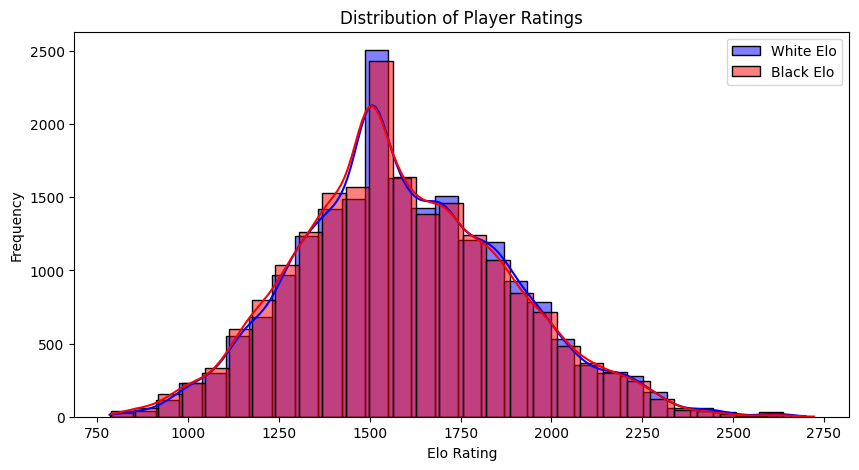

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of player ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['WhiteElo'], bins=30, kde=True, color='blue', label='White Elo')
sns.histplot(df['BlackElo'], bins=30, kde=True, color='red', label='Black Elo')
plt.title('Distribution of Player Ratings')
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [21]:
# Calculate rating difference
df['RatingDifference'] = df['WhiteElo'] - df['BlackElo']

# Analyze win rates
win_rate = df.groupby('Result')['RatingDifference'].mean()
print("Average Rating Difference for Each Result:")
print(win_rate)


Average Rating Difference for Each Result:
Result
black   -88.981113
draw     14.348421
white    95.307469
Name: RatingDifference, dtype: float64


Top 10 Most Common Openings:
Opening
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64


<ipython-input-22-c809dbde2117>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=opening_counts.values, y=opening_counts.index, palette='viridis')


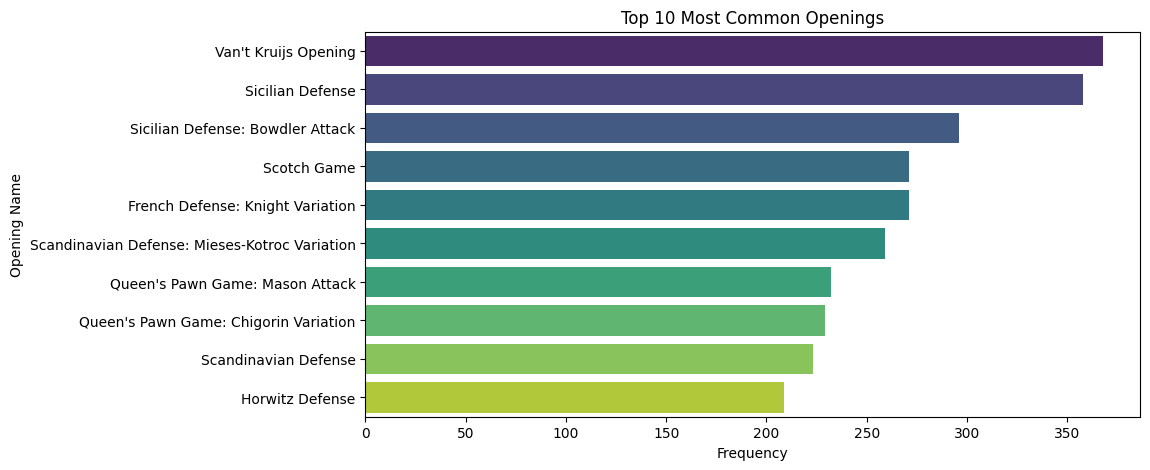

In [22]:
# Count most common openings
opening_counts = df['Opening'].value_counts().head(10)
print("Top 10 Most Common Openings:")
print(opening_counts)

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=opening_counts.values, y=opening_counts.index, palette='viridis')
plt.title('Top 10 Most Common Openings')
plt.xlabel('Frequency')
plt.ylabel('Opening Name')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode Result column
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])
print("Result mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Result mapping: {'black': 0, 'draw': 1, 'white': 2}


In [24]:
# Count number of moves in each game
df['NumberOfMoves'] = df['MoveList'].apply(lambda x: len(x.split()))


In [25]:
df = df.drop(['MoveList'], axis=1)


In [26]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (16046, 5)
Testing set size: (4012, 5)


In [29]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = ['Opening']

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(df[categorical_columns])

# Convert encoded features to a DataFrame
encoded_df = pd.DataFrame(
    encoded_features,
    columns=one_hot_encoder.get_feature_names_out(categorical_columns)
)

# Drop original categorical columns and concatenate encoded features
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print("Data after encoding:")
print(df.head())


Data after encoding:
   WhiteElo  BlackElo  Result  RatingDifference  NumberOfMoves  \
0      1500      1191       2               309             13   
1      1322      1261       0                61             16   
2      1496      1500       2                -4             61   
3      1439      1454       2               -15             61   
4      1523      1469       2                54             95   

   Opening_Alekhine Defense #2  Opening_Alekhine Defense #3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Opening_Alekhine Defense: Balogh Variation  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3      

In [30]:
# Define features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.650049850448654
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1816
           1       0.65      0.09      0.16       192
           2       0.66      0.72      0.69      2004

    accuracy                           0.65      4012
   macro avg       0.65      0.48      0.49      4012
weighted avg       0.65      0.65      0.64      4012



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65
Precision: 0.65
Recall: 0.65
F1 Score: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1816
           1       0.65      0.09      0.16       192
           2       0.66      0.72      0.69      2004

    accuracy                           0.65      4012
   macro avg       0.65      0.48      0.49      4012
weighted avg       0.65      0.65      0.64      4012



In [35]:
import joblib

# Save the model
joblib.dump(rf_model, 'chess_model.pkl')
print("Model saved as 'chess_model.pkl'")


Model saved as 'chess_model.pkl'
